# Webscraping in python 🕸️🪛

# Definition
## **Webscraping**
- ### When we scrape a web page, we are extracting information from a webpages **HTML** code 
## **What kind of data is scraped?** 
- HCP Names and location, product info: price info, contact info name/ phone numbers, social media user profile: posts/comments/likes/followe counts, financial data:stock prices, company financials  weather data: current conditions/forecasts, forum data: reddit posts, threads, user profiles, Sports data: scores, player stats, match schedules, public records: court cases, patents, trademarks , licenses   etc..
    - Used to make price trackers, news headline aggregators, realestate analyses, businees or customer directories, 

### What is HTML?
- HTML stands for HyperText Markup Language
- It is the standard language used to create and design web pages
- Think of HTML as the building blocks of the web, tells your web browser how to display content on a web page, such as text, images, links, and more

### Basic HTML structure for a webpage
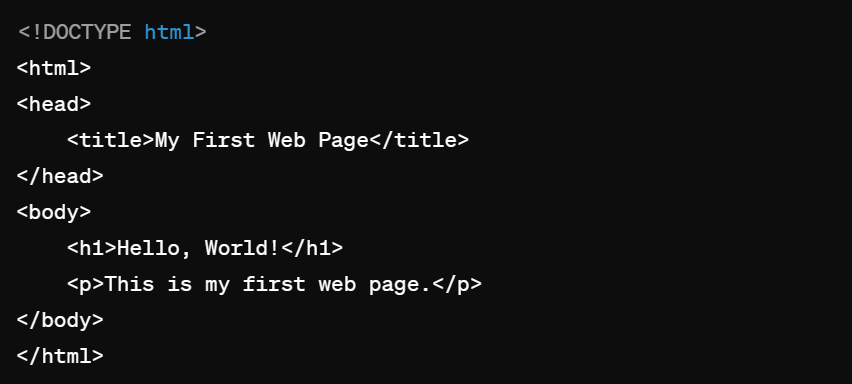
- Webpages are basically made of building blocks called elements that are denoted by tags that look like this: <>
- !DOCTYPE html: This tells the browser that the document type is HTML5.
- html: The root element that contains all the other elements.
- head: Contains meta-information about the HTML document, like its title.
- title: Sets the title of the web page (shown in the browser's title bar or tab).
- body: Contains the content of the web page that you see in the browser.
- h1: A heading element, used for main headings.
- p: A paragraph element, used for blocks of text.



## When we scrape a webpage ...
## - We target specific elements in the HTML code that contain the data we need
## -  for example, if we want to scrape the text "Hello, World!" from the example above, we would target the 'h1' element

## Install and load webscraping packages

In [28]:

# installs these packages,  if you dont already have these packages:

#  this one is for scraping webpages
! pip install beautifulsoup4  

 # standard for making HTTP requests, will be used along with beautifulsoup to get the HTML code for the website#  this one is for scraping webpages
! pip install requests     

 # to extract the HTML text from the webpage
! pip install lxml                 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# load the packages needed for scraping


import requests
from bs4 import BeautifulSoup


import pandas as pd # for converting data to table structure

# Extract provider directory from HCP org webpage

## The native structure on the webpage
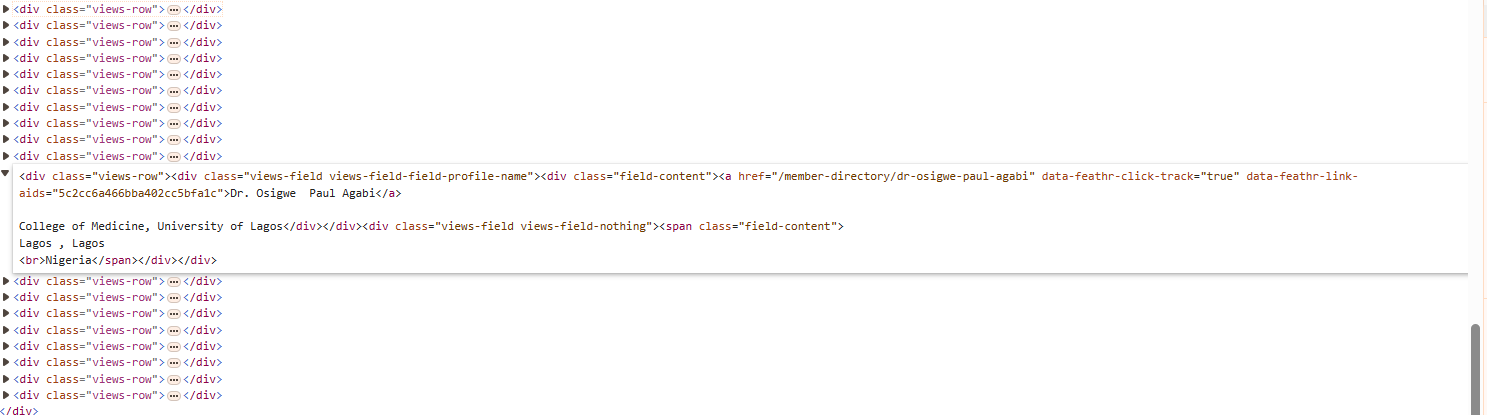


## (double click anywhere in this cell, to peek inside and see the html)

<div class="views-row"><div class="views-field views-field-field-profile-name"> 
<div class="field-content"><a href="/member-directory/dr-osigwe-paul-agabi" data-feathr-click-track="true" data-feathr-link-aids="5c2cc6a466bba402cc5bfa1c">Dr. Osigwe  Paul Agabi</a>

College of Medicine, University of Lagos</div>
</div><div class="views-field views-field-nothing">
<span class="field-content">
Lagos , Lagos  
<br>Nigeria</span></div></div>

# Important elements of a webpage:
- ## What is a 'div' element?
    - ### In HTML (HyperText Markup Language), a div element is a container used to group together HTML elements and apply styles to them
    -  ### The div tag is short for "division," and it's a very common element in HTML used to structure a web page

# Important elements of a webpage:
- ## What is a Class?
    - ### In HTML, a class is an attribute that you can add to any HTML element to apply styles or to identify it for other purposes
    -  ### Classes are defined as 'class' and can be used to apply the same style or behavior to multiple elements.

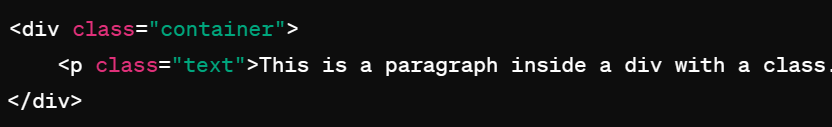


### In the above example html image:

- The **div** element has a **class** named container
- The p (paragraph) element has a class named text
- Classes help in selecting and styling multiple elements efficiently
- In Web scraping the classes help us to specifically target elements


<div class="member-directory">
    <div class="member">
        <div class="name">John Doe</div>
        <div class="institution">Some University</div>
        <div class="location">Some City, Some Country</div>
    </div>
    <div class="member">
        <div class="name">Jane Smith</div>
        <div class="institution">Another University</div>
        <div class="location">Another City, Another Country</div>
    </div>
</div>

# How are **'div'**  Elements and **Classes** Used in Web Scraping?
- ## When scraping a webpage, we often target **div** elements with specific **classes** to extract the information we need
-  ## This is because many websites use **div** elements alongside specific **classes** to organize and style their content

## Consider the following example HTML page: 

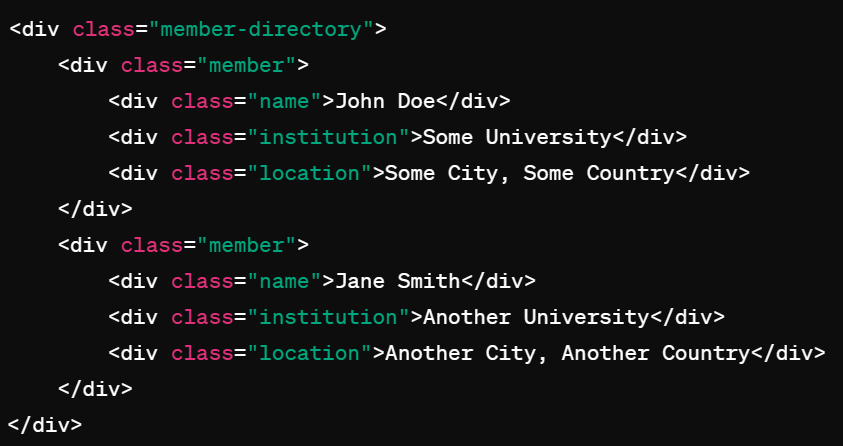

# Main steps in Webscraping
## 1. Finding Elements:
- ### You need to know which HTML elements (like 'div', 'p', 'span', etc.) contain the data you want to extract
- ### We use the class attribute to locate specific div elements that contain the information we need
## 2. Extracting Data:
- ### Once we locate the div elements, we extract the text or other attributes inside them
- ### Using Classes and IDs: Classes (class="example") and IDs (id="example") help you locate the specific elements you need within the HTML structure

# Current Example: Webscraping an HCP Directory 
## HTML structure
- ## **div.views-row** is the main container for each member's information
- ## **div.views-field-field-profile-name**   contains the HCP name and institution
    - There is also nested div.field-content element that will allow to more directly access the name and institution
- ## **div.views-field-field-nothing**  contains the institution, city, state, and country
    - There is also nested span.field-content elemenent that will allow to more directly access the geographic location

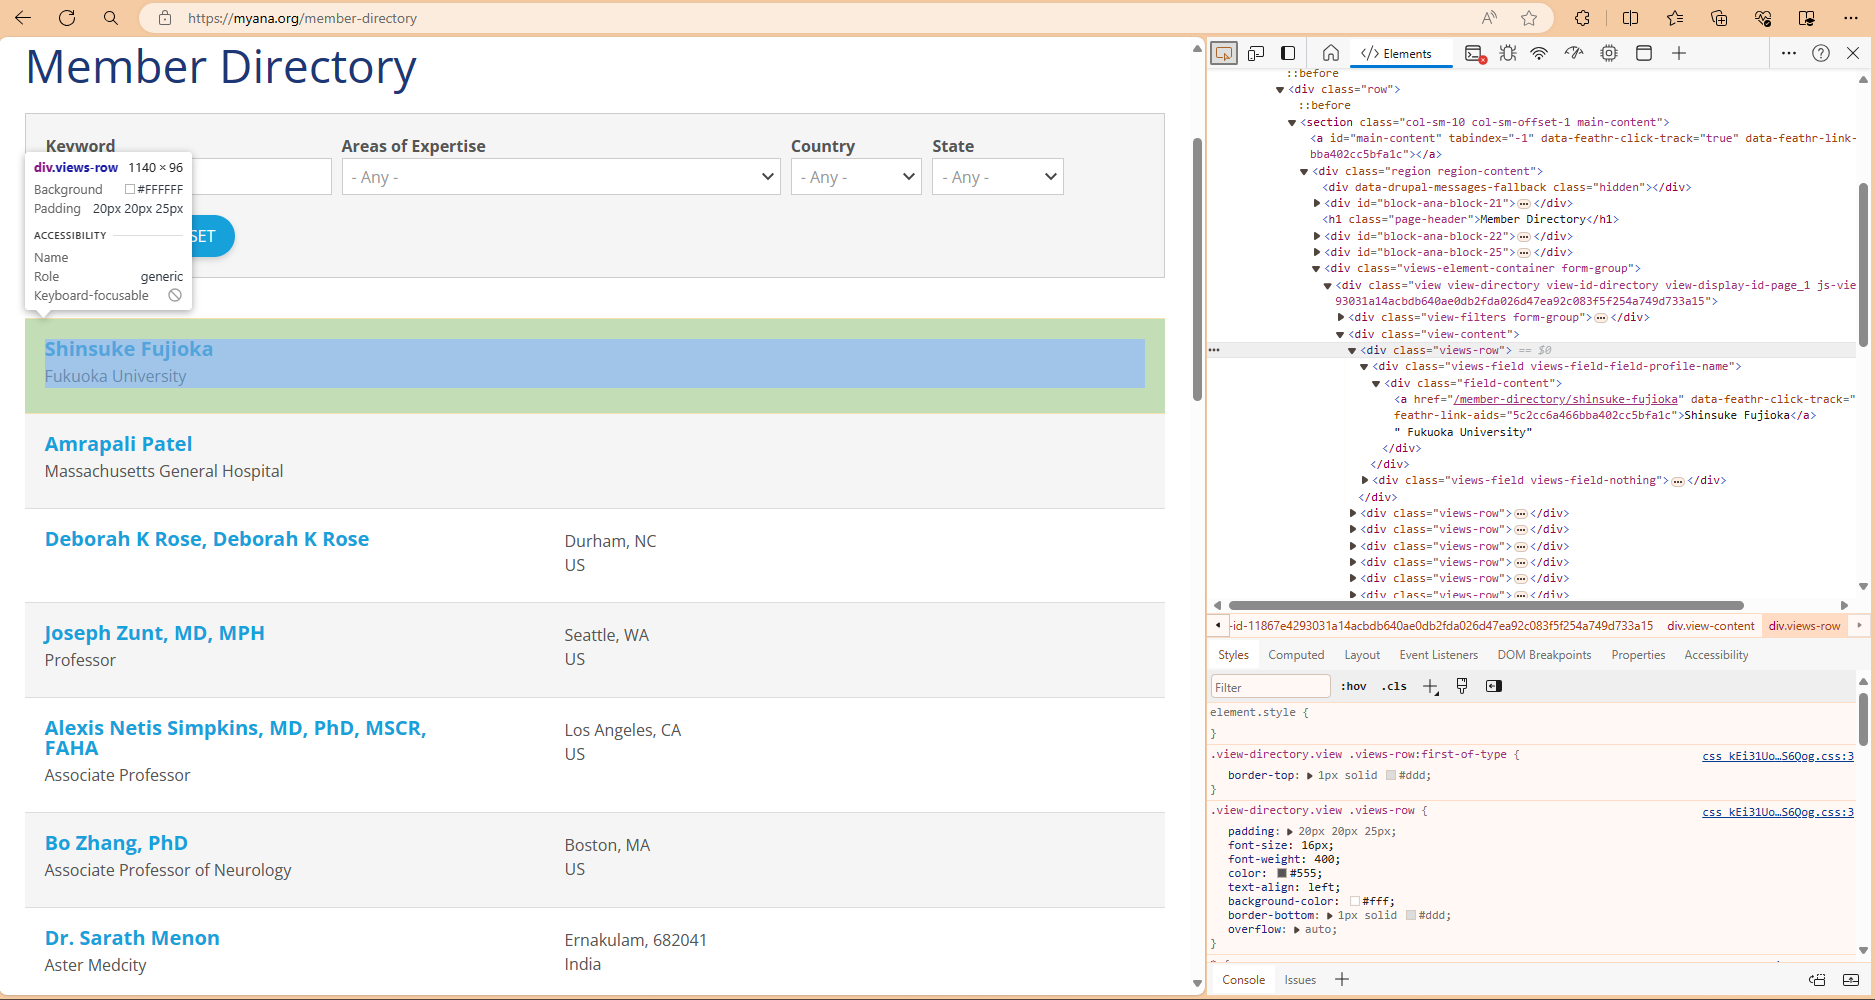

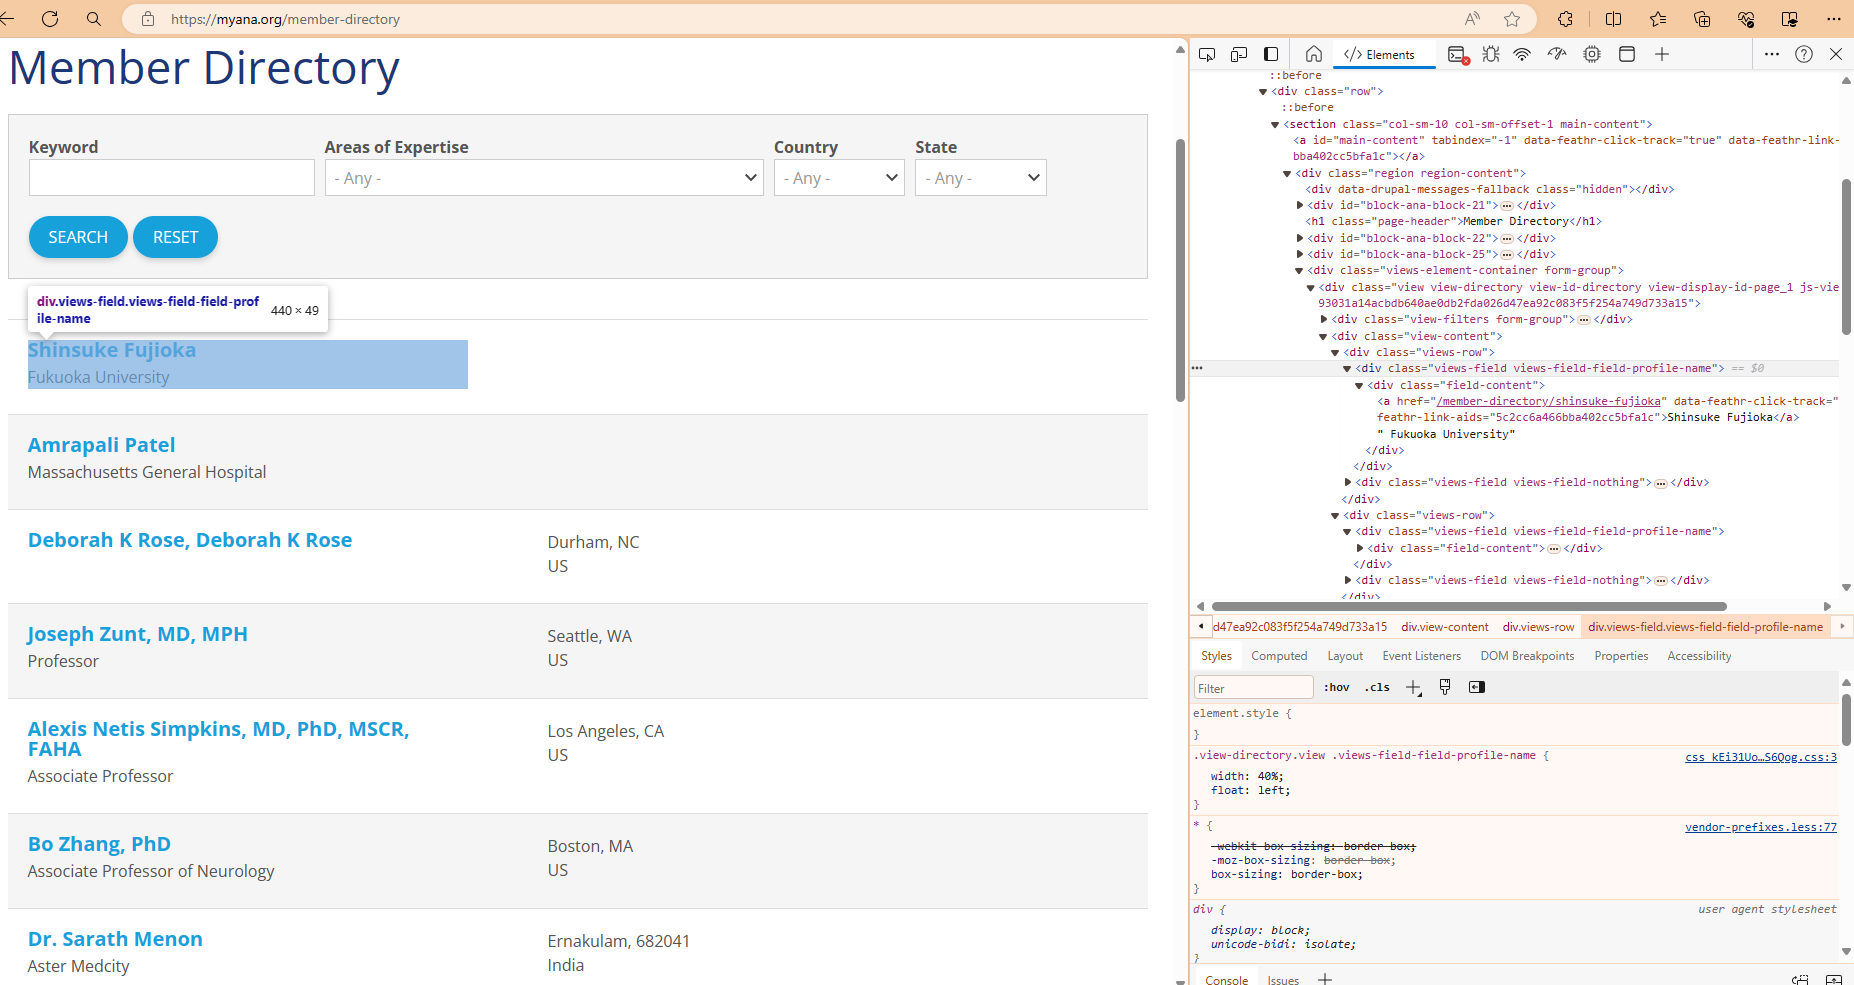

In [12]:
# Base URL of the member directory
#https://myana.org/member-directory original 
# add ?page= to url
base_url = 'https://myana.org/member-directory?page='

# List to store the extracted data
data = []

# Function to extract data from a single page
def extract_data_from_page(page_number):
    url = base_url + str(page_number)
    response = requests.get(url)
    
    # The HTML content is loaded into BeautifulSoup, which parses it into a tree structure
    soup = BeautifulSoup(response.content, 'html.parser')

    
    # This line finds all the target data (i.e., all rows of HCP data listed) on the page by locating all div elements with the class views-row
    # We use soup.find_all('div', class_='views-row') to find all div elements with the class views-row
    # Remember that you many need to adjust the selectors based on the structure of the website (what major groups are used to separate the distinct data entries???)
    members = soup.find_all('div', class_='views-row') # this is the so-called soup, it is all the target information on the page we want to select, extract and sort through

    for member in members:
        
        # Extract the name and location
        #For each member div, we find the nested div elements with classes views-field-field-profile-name' for name and institution,
        name_div = member.find('div', class_='views-field-field-profile-name')
        
        if name_div: # If there is name, location data in that element,then
            
            #This block extracts the combined name and institution text, then splits it into separate name and institution values based on the presence of a newline character.
            name_location = name_div.get_text(separator="\n", strip=True)
            name, location = name_location.split('\n', 1) if '\n' in name_location else (name_location, '')
        else:
            name, location = '', ''

        data.append({
            'Name': name,
            'Location': location
        })


# Loop through multiple pages
for page_number in range(0, 11):  # Adjust the range based on the number of pages
    extract_data_from_page(page_number)

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Save the data to a CSV file
df.to_csv('member_directory_Names.csv', index=False)

print("Data extraction complete. Saved to 'member_directory.csv'.")

Data extraction complete. Saved to 'member_directory.csv'.


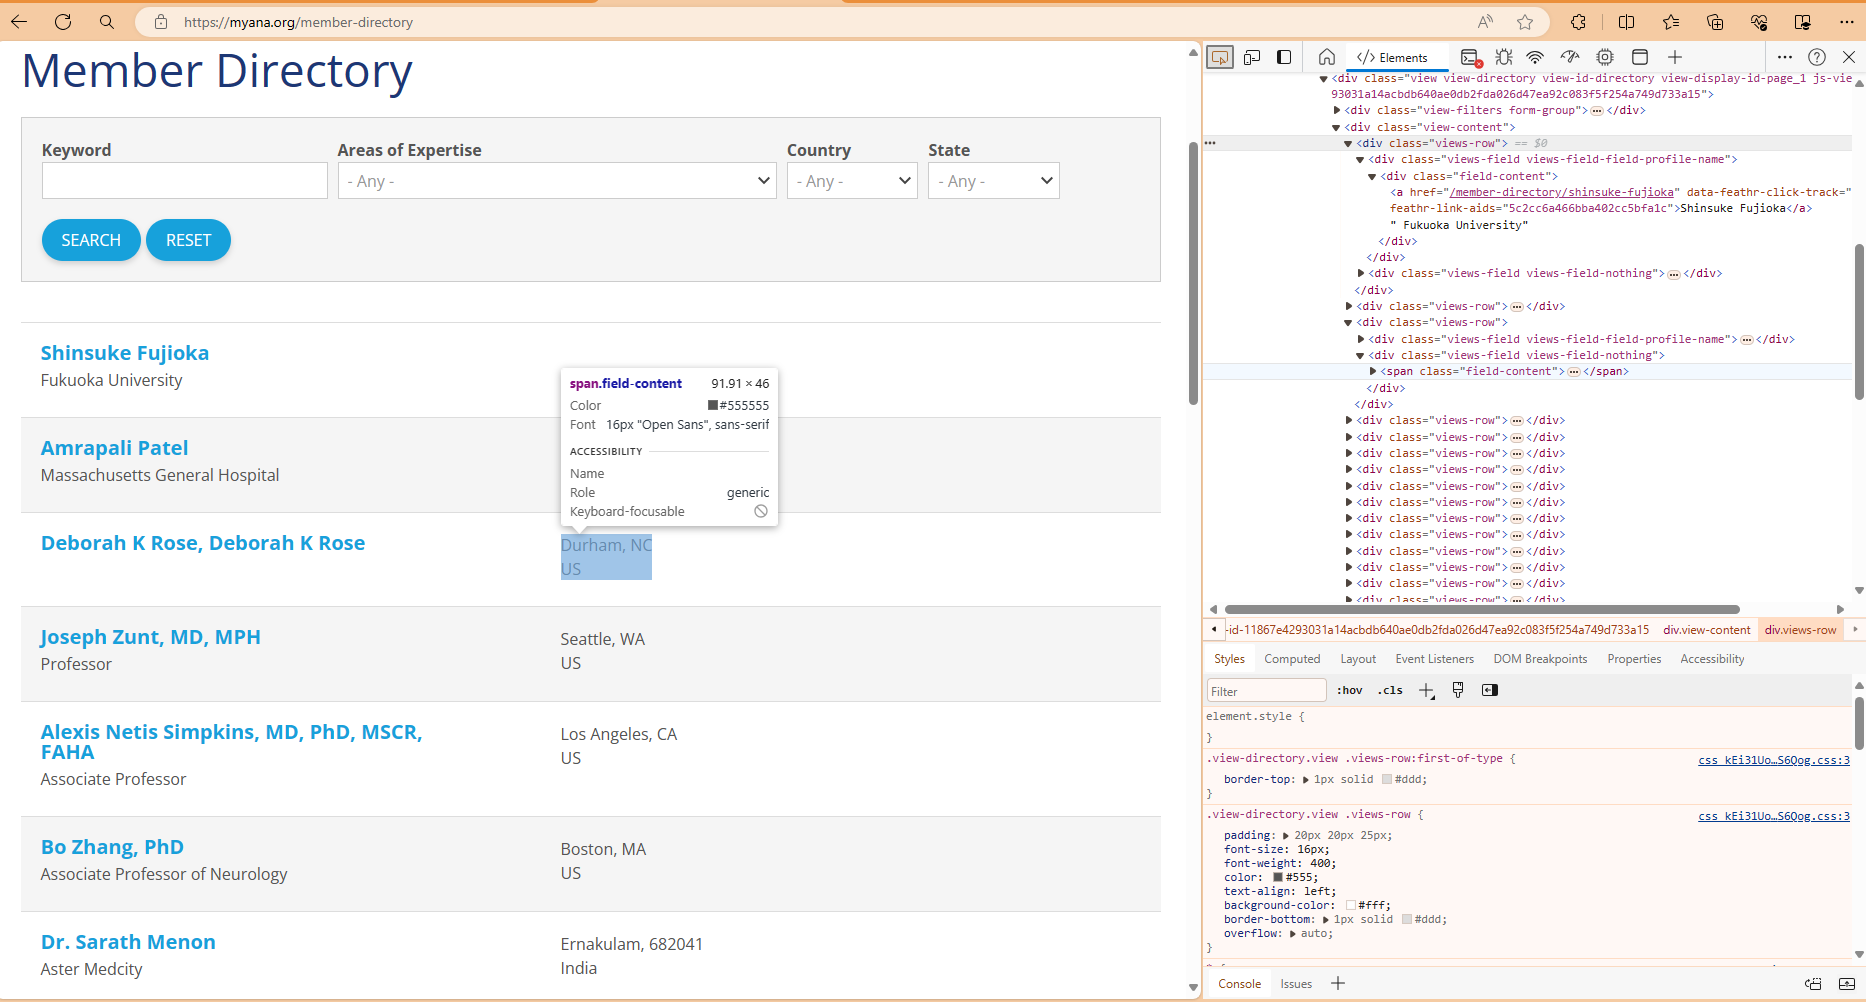

In [17]:
# Base URL of the member directory with pagination
base_url = 'https://myana.org/member-directory?page='

# List to store the extracted data
data = []

# Function to extract data from a single page

def extract_data_from_page(page_number):
    url = base_url + str(page_number)
    response = requests.get(url)
    
    # The HTML content is loaded into BeautifulSoup, which parses it into a tree structure
    soup = BeautifulSoup(response.content, 'html.parser')

    
    # This line finds all the target data (i.e., all rows of HCP data listed) on the page by locating all div elements with the class views-row
    # We use soup.find_all('div', class_='views-row') to find all div elements with the class views-row
    # Remember that you many need to adjust the selectors based on the structure of the website (what major groups are used to separate the distinct data entries???)
    members = soup.find_all('div', class_='views-row')

    for member in members:
        # Extract the name and institution
        #For each member div, we find the nested div elements with classes views-field-field-profile-name' for name and institution,
        name_div = member.find('div', class_='views-field-field-profile-name')
       
        if name_div:
            name_location = name_div.get_text(separator="\n", strip=True)  # This block ensures that the name and institution are separated correctly using a newline as the separator.
            name, institution = name_location.split('\n', 1) if '\n' in name_location else (name_location, '')
        else:
            name, institution = '', ''
        
        # Extract the geographic location
        # From the HTML , geogrpahic info is stored in the span element with the class 'field-content'
        # Since the span element is nested within the div elements found earlier, it can be accessed directly without needing to go through additional nested div elements
        # means that the geographic location is nested within the div elements and can be accessed directly through the span element
        #For each member div, we find the nested span elements with classes field-content' for geographic location
        geo_location_span = member.find('span', class_='field-content')
        geo_location = geo_location_span.get_text(strip=True) if geo_location_span else ''

        
        # Append the extracted data to the data list with separate keys for 'Name', 'Institution', and 'Location'.
        data.append({
            'Name': name,
            'Institution': institution,
            'Location': geo_location
        })


# Loop through multiple pages (adjust the range based on the number of pages available)
for page_number in range(1, 6):  # Assuming there are 5 pages, adjust as needed
    extract_data_from_page(page_number)

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Save the data to a CSV file
df.to_csv('member_directory_location_info.csv', index=False)

print("Data extraction complete. Saved to 'member_directory.csv'.")

Data extraction complete. Saved to 'member_directory.csv'.


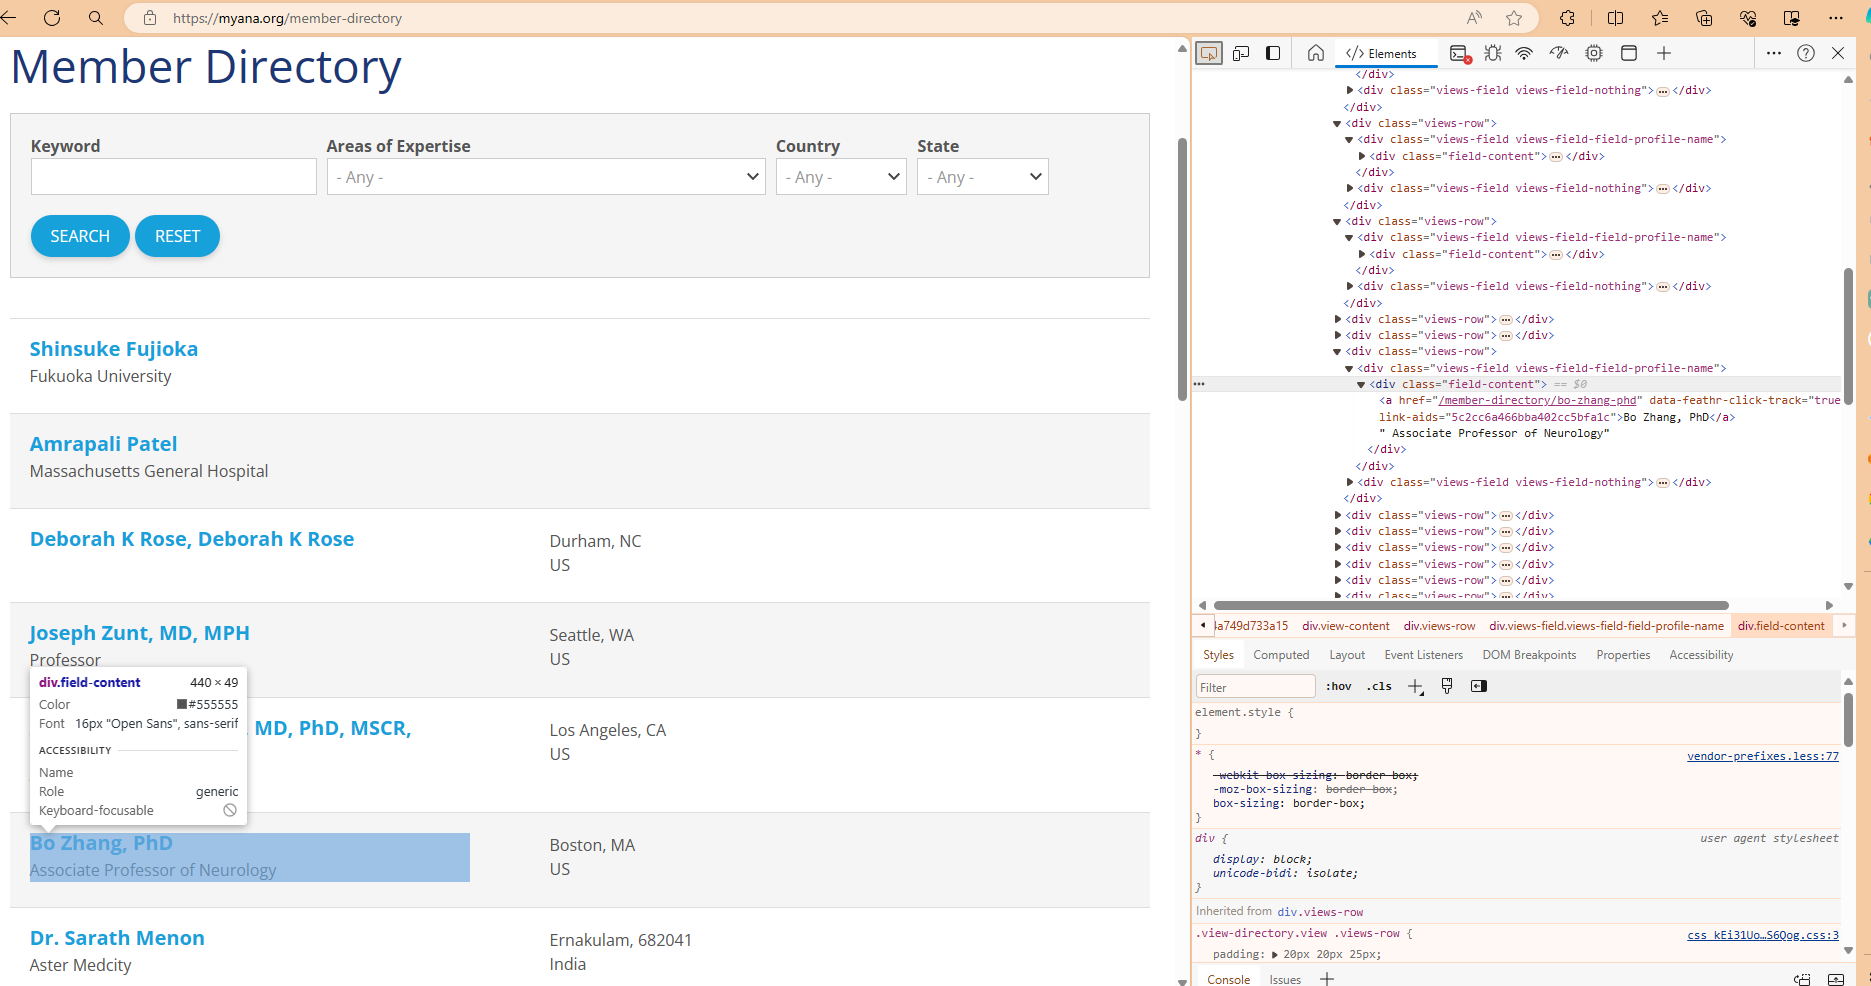

In [19]:
# Base URL of the member directory with pagination
base_url = 'https://myana.org/member-directory?page='

# List to store the extracted data
data = []

# Function to extract data from a single page

# Function to extract data from a single page
def extract_data_from_page(page_number):
    url = base_url + str(page_number)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Adjust the selectors based on the structure of the website
    # This line finds all the target data (i.e., all rows of HCP data listed) on the page by locating all div elements with the class views-row
    members = soup.find_all('div', class_='views-row')

    for member in members:
        # Using the more specific class_='field-content' to directly access the content might simplify the code and make it more robust if the structure of the HTML elements changes
        # Given that div.field-content seems to be a direct child and contains the relevant text, let's try this approach
         #For each member div, we find the nested div elements with classes field-content' for  name and institution
        name_div = member.find('div', class_='field-content')
       
        if name_div:
            name_location = name_div.get_text(separator="\n", strip=True)  # This block ensures that the name and institution are separated correctly using a newline as the separator
            name, institution = name_location.split('\n', 1) if '\n' in name_location else (name_location, '')
        else:
            name, institution = '', ''
        
        # Extract the geographic location
        # From the HTML , geogrpahic info is stored in the span element with the class 'field-content'
        # Since the span element is nested within the div elements found earlier, it can be accessed directly without needing to go through additional nested div elements
        # means that the geographic location is nested within the div elements and can be accessed directly through the span element
         #For each member div, we find the nested span elements with classes field-content' for geographic location
        geo_location_span = member.find('span', class_='field-content')
        geo_location = geo_location_span.get_text(strip=True) if geo_location_span else ''

        
        # Append the extracted data to the data list with separate keys for 'Name', 'Institution', and 'Location'.
        data.append({
            'Name': name,
            'Institution': institution,
            'Location': geo_location
        })


# Loop through multiple pages (adjust the range based on the number of pages available)
for page_number in range(1, 6):  # Assuming there are 5 pages, adjust as needed
    extract_data_from_page(page_number)

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Save the data to a CSV file
df.to_csv('member_directory_location_info_simplerway.csv', index=False)

print("Data extraction complete. Saved to 'member_directory.csv'.")

Data extraction complete. Saved to 'member_directory.csv'.


# Why Direct Access Works
- ## **div.views-row** is the main container for each member's information
- ## **div.views-field-field-profile-name**   contains the HCP name and institution
    - ### Given this structure, if we access **div.field-content** within div.views-field-field-profile-name, we are directly targeting the element that contains the name and institution
- ## **div.views-field-field-nothing**  contains the institution, city, state, and country
    -  ### Similarly, accessing **span.field-content** within div.views-field-field-nothing allows us to get the institution and location information directly

# **Summary** 
- ## HTML is the language used to create and design web pages, and elements are their building blocks
- ## A div element is a container in HTML used to group content and apply styles
- ## Classes are used to style elements and make them easier to identify
- ## In web scraping, we use the div element and specific classes to locate and extract the desired content from a web page